<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'

In [2]:
file_nested_list = []
with open(DATA_FILE, "r", newline="\n") as infile:
    for row in csv.reader(infile, delimiter="\t"):
        file_nested_list.append(row)

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [3]:
header = file_nested_list[0]
data = file_nested_list[1:]

In [4]:
print(header)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [5]:
for row in data[0:10]:
    print(row)

['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 ']
['1', '1', 'Izze', '[Clementine]', '$3.39 ']
['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 ']
['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 ']
['2', '2', 'Chicken Bowl', '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]', '$16.98 ']
['3', '1', 'Chicken Bowl', '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]', '$10.98 ']
['3', '1', 'Side of Chips', 'NULL', '$1.69 ']
['4', '1', 'Steak Burrito', '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]', '$11.75 ']
['4', '1', 'Steak Soft Tacos', '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]', '$9.25 ']
['5', '1', 'Steak Burrito', '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]', '$9.25 ']


---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [6]:
sorted(filter(lambda row: row[2] == "Canned Soda" and row[3] == "[Coca Cola]",data), key = lambda row: int(row[1]))

[['55', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['81', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['87', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['122', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['188', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['338', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['392', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['567', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['787', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['971', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['990', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['1001', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['1014', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['1122', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['1124', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['1195', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['1262', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['1396', '1', 'Canned Soda', '[Coca Cola]', '$1.09 '],
 ['143

Looking at the list above, we can see that price already takes qty into account. Hence we don't need to multiply the price by the qty to get the total price for an order.

In [7]:
from functools import reduce

qty_col_idx = header.index("quantity")
price_col_idx = header.index("item_price")

process_price = lambda price: float(row[price_col_idx].split("$")[1])
get_avg = lambda acc, total: ((total+acc[1]*acc[0])/(acc[1]+1), (acc[1]+1))

In [8]:
avg_price = reduce(get_avg, map(process_price, data), (0,0))[0]
print(f"${avg_price:.2f}")

$9.25


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [9]:
item_name_idx = header.index("item_name")
choice_col_idx = header.index("choice_description")

check_if_soda = lambda row: row[item_name_idx] in ("Canned Soda","Canned Soft Drink")
process_choice_list = lambda choices: set(choices.strip("[]").split(", "))
select_choices = lambda row: row[choice_col_idx]
add_item = lambda acc, choices: acc.union(choices) if choices != "NULL" else acc

In [10]:
unique_sodas = reduce(add_item, map(process_choice_list, map(select_choices, filter(check_if_soda, data))))

In [11]:
unique_sodas

{'Coca Cola',
 'Coke',
 'Diet Coke',
 'Diet Dr. Pepper',
 'Dr. Pepper',
 'Lemonade',
 'Mountain Dew',
 'Nestea',
 'Sprite'}

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [12]:
# Assume that the sauce (salsa) also counts as one of the toppings
# Then we don't care about choosing either the first or the second nested list
check_if_burrito = lambda row: "burrito" in row[item_name_idx].lower()
count_number_toppings = lambda row: len(row[choice_col_idx].split(","))
result = reduce(get_avg, map(count_number_toppings, filter(check_if_burrito, data)),[0,0])[0]

In [13]:
result

5.395051194539241

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [14]:
from collections import Counter

In [15]:
get_kv_pairs = lambda row: (row[item_name_idx], int(row[qty_col_idx]))

def count_items(ctr, row):
    item, qty = row
    ctr[item] += qty
    return ctr

item_count = reduce(count_items, map(get_kv_pairs, data), Counter())

In [16]:
item_count

Counter({'Chips and Fresh Tomato Salsa': 130,
         'Izze': 20,
         'Nantucket Nectar': 29,
         'Chips and Tomatillo-Green Chili Salsa': 33,
         'Chicken Bowl': 761,
         'Side of Chips': 110,
         'Steak Burrito': 386,
         'Steak Soft Tacos': 56,
         'Chips and Guacamole': 506,
         'Chicken Crispy Tacos': 50,
         'Chicken Soft Tacos': 120,
         'Chicken Burrito': 591,
         'Canned Soda': 126,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 60,
         'Carnitas Bowl': 71,
         'Bottled Water': 211,
         'Chips and Tomatillo Green Chili Salsa': 45,
         'Barbacoa Bowl': 66,
         'Chips': 230,
         'Chicken Salad Bowl': 123,
         'Steak Bowl': 221,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 97,
         'Veggie Bowl': 87,
         'Steak Crispy Tacos': 36,
         'Chips and Tomatillo Red Chili Salsa': 50,
         'Barbacoa Crispy Tacos': 12,
         'Veggie Salad Bowl': 1

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


#### Problem Statement

The restaurant owner is interested in finding out what is the most popular salsa topping among customers. Assume that each order is purchased by a different customer.

Salsa toppings of different spiciness (Hot), (Medium), (Mild) count as the same topping

In [17]:
from more_itertools import flatten

In [18]:
filter_salsa_topping = lambda topping: "Salsa" in topping
filter_tacos = lambda row: "Tacos" in row[2]

get_toppings = lambda row: row[3].split(",")

def process_salsa_toppings(salsa):
    salsa = salsa.strip("[]")
    salsa = salsa.replace("(Hot)","")
    salsa = salsa.replace("(Medium)","")
    salsa = salsa.replace("(Mild)","")
    
    return salsa.strip()

result = Counter(map(process_salsa_toppings, filter(filter_salsa_topping, flatten(map(get_toppings, filter(filter_tacos, data))))))

result.most_common()

[('Fresh Tomato Salsa', 146),
 ('Roasted Chili Corn Salsa', 93),
 ('Tomatillo Red Chili Salsa', 54),
 ('Tomatillo-Red Chili Salsa', 30),
 ('Tomatillo Green Chili Salsa', 20),
 ('Tomatillo-Green Chili Salsa', 15)]

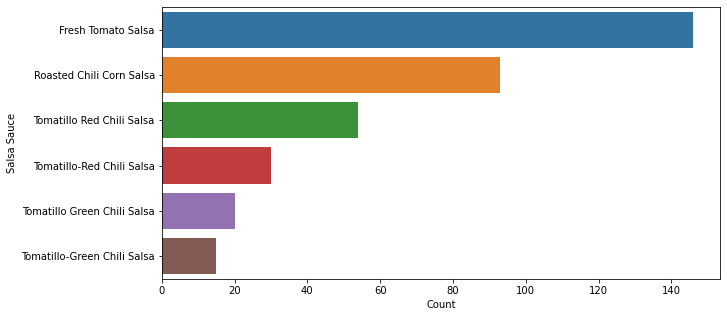

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(list(result.items()), columns=["Salsa Sauce", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data = df, y = "Salsa Sauce", x = "Count")
plt.show()